In [1]:
import json
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from urllib.parse import urlparse
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

In [2]:
file_path = "../data/1eb80fb8b50.json"

try:
    with open(file_path, "r") as json_file:
        data = json.load(json_file)
except FileNotFoundError:
    print(f"File not found: {file_path}")
except json.JSONDecodeError as e:
    print(f"JSON decoding error: {e}")

In [3]:
df_kws_article = pd.DataFrame(columns=["year", "month", "day", "url", "title", "content", "kws", "locations", "organizations", "persons"])

Years = ["2024"]
for year in Years:
    for month in range(1, 13): 
        for day in range(1, 32): 
            try:
                num = 0
                while(True):
                    try :
                        data_tmp = data['data'][str(year)][str(month)][str(day)][num]
                        num += 1
                        
                        new_data = pd.DataFrame({"year": year, 
                                                'month': month,
                                                'day': day,
                                                'url' : data_tmp["url"],
                                                'title' : data_tmp["title"],
                                                'content' : data_tmp["content"],
                                                'kws': [data_tmp["kws"]],
                                                'locations': [data_tmp["loc"]],
                                                'organizations': [data_tmp["org"]],
                                                'persons': [data_tmp["per"]]
                                                })
                        df_kws_article = pd.concat([df_kws_article, new_data], ignore_index=True)
                    except e :
                        break
            except:
                continue

In [4]:
df_kws_article

,year,month,day,url,title,content,kws,locations,organizations,persons
0,2024,2,29,Sputnik Africa-14278,"""They're monopolizing everything"": African exp...","""They're monopolizing everything"": African exp...","{'monopolize': 3, 'african': 1, 'expert': 1, '...","{'Musawenkosi Mdluli': 1, 'Mdluli': 1, 'africa...","{'BRICS': 1, 'World BRICS South Africa': 1, 'T...",{'Sputnik Africa': 1}
1,2024,3,1,Sputnik Africa-14279,🇲🇿 Mozambique's president gets immunity by Lon...,🇲🇿 Mozambique's president gets immunity by Lon...,"{'mozambique': 2, 'president': 3, 'get': 1, 'i...","{'Mozambique': 2, 'London': 1, 'africa': 1, 'S...","{'Privinvest': 4, 'Credit Suisse': 1, 'FRELIMO...","{'Filipe Nyusi': 1, 'Nyusi': 2}"
2,2024,3,1,Sputnik Africa-14280,"🇷🇺 Russia possesses largest, most diverse nucl...","🇷🇺 Russia possesses largest, most diverse nucl...","{'russia': 4, 'possess': 1, 'large': 2, 'diver...","{'Russia': 4, 'US': 1, 'Tsirkon': 1, 'Ukraine'...","{'US Strategic Command': 1, 'USSTRATCOM': 1, '...",{'Anthony Cotton': 1}
3,2024,3,1,Sputnik Africa-14281,♥️ Main world events by the morning of March 1...,♥️ Main world events by the morning of March 1...,"{'main': 1, 'world': 1, 'event': 1, 'morning':...","{'Belgorod': 2, 'Nizhny': 1, 'US': 2, 'United ...","{'Il 76': 1, 'Antalya Diplomatic Forum': 1, 'T...","{'Joe Biden': 1, 'Donald Trump': 1, 'Trump': 2..."
4,2024,3,1,Sputnik Africa-14282,🇷🇺 🇲🇱 A Russian delegation is expected in Mali...,🇷🇺 🇲🇱 A Russian delegation is expected in Mali...,"{'russian': 3, 'delegation': 2, 'expect': 1, '...","{'Mali': 4, 'africa': 1, 'Sputnik Africa': 1}","{'TikTok': 1, 'Telegram': 1}","{'Abdoulaye Diop': 1, 'Sputnik': 1}"
...,...,...,...,...,...,...,...,...,...,...
499,2024,3,15,Sputnik Africa-14910,"🇷🇺🇪🇹 ""Absolutely fair"": Ethiopian observer imp...","🇷🇺🇪🇹 ""Absolutely fair"": Ethiopian observer imp...","{'fair': 2, 'ethiopian': 1, 'observer': 3, 'im...","{'Ethiopia': 1, 'Sputnik Africa': 1, 'africa':...","{'Bonga University': 1, 'Omega': 1, 'TikTok': ...",{'Petros Woldegiorgi': 1}
500,2024,3,15,Sputnik Africa-14911,❗️Four people injured after Kiev regime's shel...,❗️Four people injured after Kiev regime's shel...,"{'people': 2, 'injure': 2, 'kiev': 1, 'regime'...","{'Kiev': 1, 'Belgorod': 6, 'Moscow': 1, 'afric...","{'Russian Defense Ministry': 1, 'TikTok': 1, '...","{'Vyacheslav Gladkov': 1, 'Gladkov': 1}"
501,2024,3,15,Sputnik Africa-14912,🇷🇺🗳🇹🇿 “Very open and freely”: Tanzanian observ...,🇷🇺🗳🇹🇿 “Very open and freely”: Tanzanian observ...,"{'open': 3, 'tanzanian': 1, 'observer': 2, 'ru...","{'Sputnik Africa': 1, 'Mgaya': 1, 'africa': 1,...","{'TikTok': 1, 'Telegram': 1}",{'Joseph Mgaya': 1}
502,2024,3,15,Sputnik Africa-14913,🇵🇸 Palestinian President Abbas tasks Mohammad ...,🇵🇸 Palestinian President Abbas tasks Mohammad ...,"{'palestinian': 3, 'president': 2, 'abbas': 3,...","{'West Bank': 1, 'Gaza': 1, 'africa': 1, 'Sput...","{'WAFA': 1, 'World Bank': 1, 'Palestine Invest...","{'Abba': 2, 'Mohammad Mustafa': 2, 'Mahmoud Ab..."


In [5]:
list_words = df_kws_article["persons"].tolist()

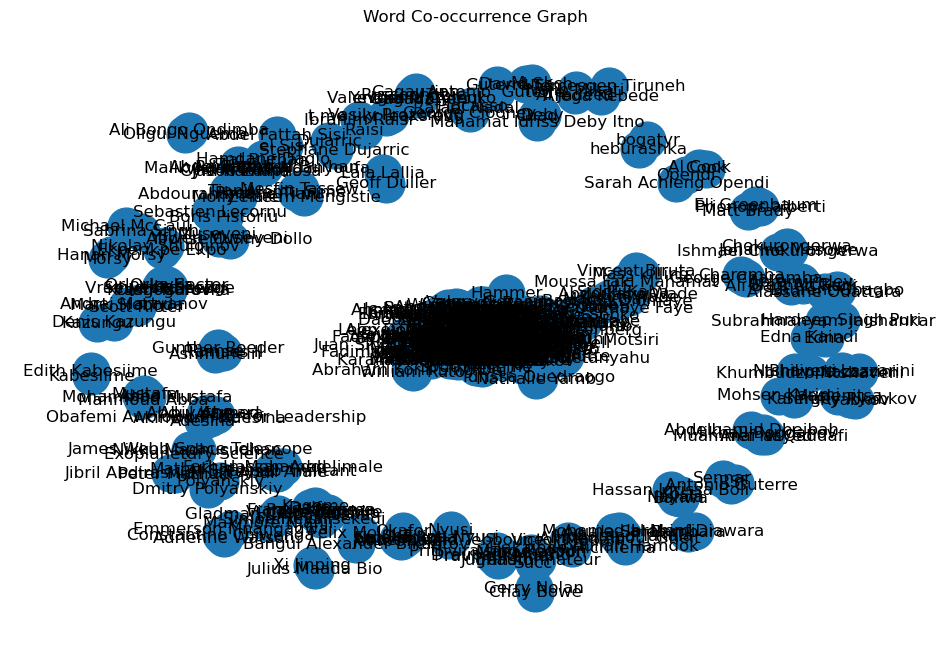

In [6]:
# Create a graph
G = nx.Graph()

# Iterate through each dictionary
for dictionary in list_words:
    # Get all words in the current dictionary
    words = list(dictionary.keys())
    
    # Generate all combinations of words (edges) from the current dictionary
    for word1, word2 in combinations(words, 2):
        # Get the minimum frequency of the two words
        weight = min(dictionary[word1], dictionary[word2])
        
        # Add the edge to the graph (if it doesn't exist, initialize the weight)
        if G.has_edge(word1, word2):
            G[word1][word2]['weight'] += weight
        else:
            G.add_edge(word1, word2, weight=weight)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Draw edges
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] for (u, v, d) in edges], alpha=0.5)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12)

# Show the plot
plt.title("Word Co-occurrence Graph")
plt.axis('off')  # Turn off the axis
plt.show()

In [7]:
nx.write_gexf(G, "persons.gexf")

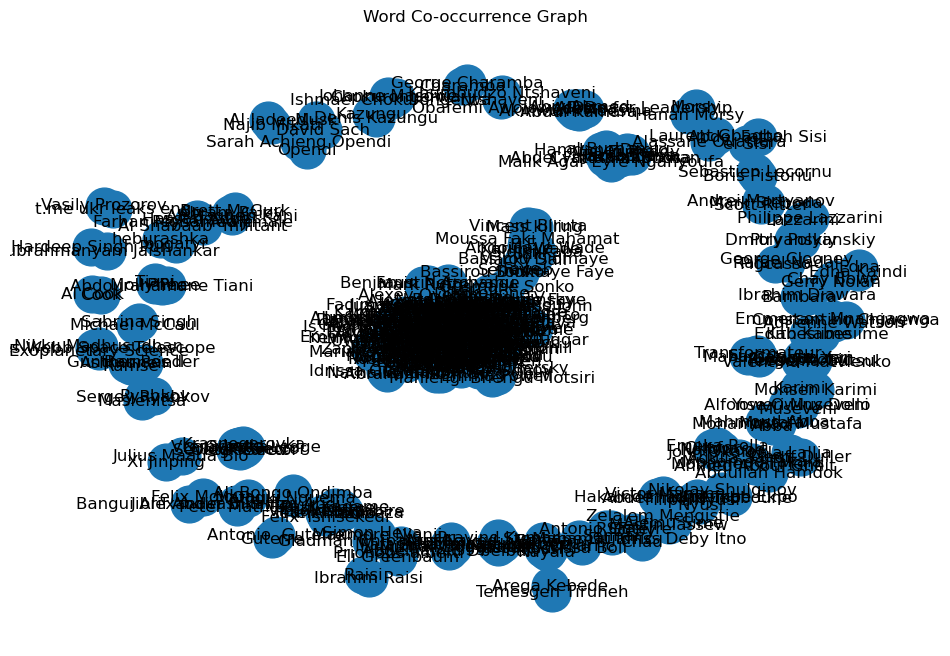

In [8]:
import json
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from urllib.parse import urlparse
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

if __name__ == "__main__":

    file_path = "../data/1eb80fb8b50.json"

    try:
        with open(file_path, "r") as json_file:
            data = json.load(json_file)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except json.JSONDecodeError as e:
        print(f"JSON decoding error: {e}")
        
    df_kws_article = pd.DataFrame(columns=["year", "month", "day", "url", "title", "content", "kws", "locations", "organizations", "persons"])

    Years = ["2024"]
    for year in Years:
        for month in range(1, 13): 
            for day in range(1, 32): 
                try:
                    num = 0
                    while(True):
                        try :
                            data_tmp = data['data'][str(year)][str(month)][str(day)][num]
                            num += 1
                            
                            new_data = pd.DataFrame({"year": year, 
                                                    'month': month,
                                                    'day': day,
                                                    'url' : data_tmp["url"],
                                                    'title' : data_tmp["title"],
                                                    'content' : data_tmp["content"],
                                                    'kws': [data_tmp["kws"]],
                                                    'locations': [data_tmp["loc"]],
                                                    'organizations': [data_tmp["org"]],
                                                    'persons': [data_tmp["per"]]
                                                    })
                            df_kws_article = pd.concat([df_kws_article, new_data], ignore_index=True)
                        except e :
                            break
                except:
                    continue

    list_words = df_kws_article["persons"].tolist()

# Create a graph
G = nx.Graph()

# Iterate through each dictionary
for dictionary in list_words:
    # Get all words in the current dictionary
    words = list(dictionary.keys())
    
    # Generate all combinations of words (edges) from the current dictionary
    for word1, word2 in combinations(words, 2):
        # Get the minimum frequency of the two words
        weight = min(dictionary[word1], dictionary[word2])
        
        # Add the edge to the graph (if it doesn't exist, initialize the weight)
        if G.has_edge(word1, word2):
            G[word1][word2]['weight'] += weight
        else:
            G.add_edge(word1, word2, weight=weight)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Draw edges
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[d['weight'] for (u, v, d) in edges], alpha=0.5)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12)

# Show the plot
plt.title("Word Co-occurrence Graph")
plt.axis('off')  # Turn off the axis
plt.show()

nx.write_gexf(G, "persons.gexf")